In [34]:
import kagglehub

C:\Users\yajith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
path = kagglehub.dataset_download("siddharthmandgi/chocolate-classification")

In [36]:
print("Path to dataset files:", path)

Path to dataset files: C:\Users\yajith\.cache\kagglehub\datasets\siddharthmandgi\chocolate-classification\versions\1


In [ ]:
base_dir = path

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base directory
#base_dir = "path_to_chocolate_classification"

# Create data generators
train_datagen = train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Load train images (with validation split)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
# Load test images
test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 111 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [38]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [26]:
img_input = layers.Input(shape=(224, 224, 3))

x = layers.Conv2D(32, (3, 3), activation='relu')(img_input)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=img_input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

modelCheckpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [29]:
history = model.fit(train_generator, steps_per_epoch=10, validation_data=test_generator, validation_steps=5, epochs=50, verbose=2, callbacks=[earlyStopping, modelCheckpoint])

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.66660, saving model to best_model.h5


10/10 - 8s - 755ms/step - accuracy: 0.5315 - loss: 2.2796 - val_accuracy: 0.6923 - val_loss: 0.6666
Epoch 2/50

Epoch 2: val_loss improved from 0.66660 to 0.59015, saving model to best_model.h5


10/10 - 6s - 593ms/step - accuracy: 0.4955 - loss: 0.7157 - val_accuracy: 0.6538 - val_loss: 0.5902
Epoch 3/50

Epoch 3: val_loss improved from 0.59015 to 0.53091, saving model to best_model.h5


10/10 - 6s - 565ms/step - accuracy: 0.7117 - loss: 0.5533 - val_accuracy: 0.7308 - val_loss: 0.5309
Epoch 4/50

Epoch 4: val_loss improved from 0.53091 to 0.32939, saving model to best_model.h5


10/10 - 6s - 611ms/step - accuracy: 0.7748 - loss: 0.4174 - val_accuracy: 0.8462 - val_loss: 0.3294
Epoch 5/50

Epoch 5: val_loss improved from 0.32939 to 0.25954, saving model to best_model.h5


10/10 - 6s - 590ms/step - accuracy: 0.8829 - loss: 0.3979 - val_accuracy: 0.8462 - val_loss: 0.2595
Epoch 6/50

Epoch 6: val_loss did not improve from 0.25954
10/10 - 5s - 502ms/step - accuracy: 0.9189 - loss: 0.2820 - val_accuracy: 0.8077 - val_loss: 0.3893
Epoch 7/50

Epoch 7: val_loss did not improve from 0.25954
10/10 - 7s - 651ms/step - accuracy: 0.8919 - loss: 0.2659 - val_accuracy: 0.8462 - val_loss: 0.3357
Epoch 8/50

Epoch 8: val_loss did not improve from 0.25954
10/10 - 6s - 645ms/step - accuracy: 0.7748 - loss: 0.4002 - val_accuracy: 0.6923 - val_loss: 0.6803
Epoch 9/50

Epoch 9: val_loss improved from 0.25954 to 0.23582, saving model to best_model.h5


10/10 - 7s - 744ms/step - accuracy: 0.8829 - loss: 0.3487 - val_accuracy: 0.8846 - val_loss: 0.2358
Epoch 10/50

Epoch 10: val_loss did not improve from 0.23582
10/10 - 6s - 568ms/step - accuracy: 0.9009 - loss: 0.2472 - val_accuracy: 0.9615 - val_loss: 0.2526
Epoch 11/50

Epoch 11: val_loss improved from 0.23582 to 0.18477, saving model to best_model.h5


10/10 - 8s - 788ms/step - accuracy: 0.9459 - loss: 0.2413 - val_accuracy: 0.8846 - val_loss: 0.1848
Epoch 12/50

Epoch 12: val_loss did not improve from 0.18477
10/10 - 5s - 530ms/step - accuracy: 0.9279 - loss: 0.1891 - val_accuracy: 0.9231 - val_loss: 0.1974
Epoch 13/50

Epoch 13: val_loss improved from 0.18477 to 0.13653, saving model to best_model.h5


10/10 - 7s - 749ms/step - accuracy: 0.9730 - loss: 0.1481 - val_accuracy: 0.9615 - val_loss: 0.1365
Epoch 14/50

Epoch 14: val_loss improved from 0.13653 to 0.11168, saving model to best_model.h5


10/10 - 6s - 613ms/step - accuracy: 0.9550 - loss: 0.1386 - val_accuracy: 0.9615 - val_loss: 0.1117
Epoch 15/50

Epoch 15: val_loss improved from 0.11168 to 0.08999, saving model to best_model.h5


10/10 - 6s - 592ms/step - accuracy: 0.9550 - loss: 0.1209 - val_accuracy: 0.9615 - val_loss: 0.0900
Epoch 16/50

Epoch 16: val_loss did not improve from 0.08999
10/10 - 5s - 480ms/step - accuracy: 0.9820 - loss: 0.0849 - val_accuracy: 0.9231 - val_loss: 0.1312
Epoch 17/50

Epoch 17: val_loss did not improve from 0.08999
10/10 - 7s - 680ms/step - accuracy: 0.9550 - loss: 0.0992 - val_accuracy: 0.9231 - val_loss: 0.1057
Epoch 18/50

Epoch 18: val_loss improved from 0.08999 to 0.06480, saving model to best_model.h5


10/10 - 7s - 744ms/step - accuracy: 0.9640 - loss: 0.1129 - val_accuracy: 0.9615 - val_loss: 0.0648
Epoch 19/50

Epoch 19: val_loss did not improve from 0.06480
10/10 - 5s - 532ms/step - accuracy: 0.9730 - loss: 0.0991 - val_accuracy: 0.9231 - val_loss: 0.1327
Epoch 20/50

Epoch 20: val_loss did not improve from 0.06480
10/10 - 7s - 686ms/step - accuracy: 0.9730 - loss: 0.0711 - val_accuracy: 0.9231 - val_loss: 0.0916
Epoch 21/50

Epoch 21: val_loss did not improve from 0.06480
10/10 - 6s - 649ms/step - accuracy: 0.9730 - loss: 0.0668 - val_accuracy: 0.9615 - val_loss: 0.0743
Epoch 22/50

Epoch 22: val_loss did not improve from 0.06480
10/10 - 6s - 620ms/step - accuracy: 0.9820 - loss: 0.0460 - val_accuracy: 0.8846 - val_loss: 0.1723
Epoch 23/50

Epoch 23: val_loss did not improve from 0.06480
10/10 - 7s - 678ms/step - accuracy: 0.9640 - loss: 0.0787 - val_accuracy: 0.9231 - val_loss: 0.1218
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 18.


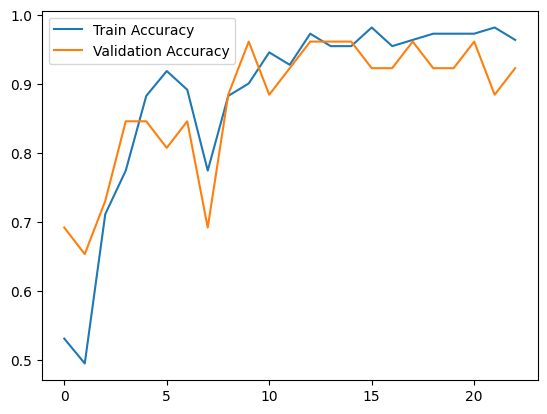

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [31]:
predict_base_dir = 'D:\\Workspace\\Python Project\\kaggle\\chocolate\\testing'

In [32]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

img = imread(os.path.join(predict_base_dir, 'white-chocolate-with-milk-powder.jpg'))
img = resize(img, (224, 224, 3), anti_aliasing=True)
img_array = np.array(img)
img_array = img_array.reshape(224,224,3)
pred = history.model.predict(np.expand_dims(img_array, axis=0))
print(pred)
pred.argmax()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
[[0.99814034]]


0